# Step Identifier

## Why
Getting to know each step taken is key towards measuring its *quality and consequence* for a gait event during a walking session. As presented in [Fast.ai's Fastbook](https://nbviewer.org/github/fastai/fastbook/blob/master/01_intro.ipynb#Image-Recognizers-Can-Tackle-Non-Image-Tasks) literature, time series could be transformed into images that could be used to train a recognizer to identify and predict over, using capacity built for that domain.

## Brainstorm

* From a pre captured session, get an image based dataset where each sample represents a second of 3 axis waves stamped as an image. Something like the following.

![Figure 1](./per-second.png)

*  Group samples into categories (using techniques such as `from scipy.signal import find_peaks`) to get a big pictyure on how distribution works. Identifying  and differentiating steps per origin.

* [defer-for-later] Match against tri-axial device gathered data, merging the corresponding dat segment, into a single row. This will add features to each sample.

* To each origin (n, m or 1, 2), label it.

* Train a prediction model. Measure it 80/20.

* Compare models between simple (per second) and extended (half-second displaced `window`) datasets 

In [1]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv("../datasets/wit-10hz.csv", sep='\t')
df_raw.columns = ["time", "acx", "acy", "acz","gyx", "gyy", "gyz", "roll", "pitch", "yaw"]
df_raw.drop(["gyx", "gyy", "gyz", "roll", "pitch", "yaw"], axis=1, inplace=True)

df_raw['timedf'] = pd.to_datetime(df_raw['time'])
df_raw.info()
df_raw.drop('time', axis=1, inplace=True)
df_raw.columns = ["acx", "acy", "acz", "time"]
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64892 entries, 0 to 64891
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    64892 non-null  object        
 1   acx     64892 non-null  float64       
 2   acy     64892 non-null  float64       
 3   acz     64892 non-null  float64       
 4   timedf  64892 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.5+ MB


acx       acy       acz                    time
0  0.094727  0.076172  0.029297 2021-05-30 11:04:36.586
1  0.114746  0.064453  0.098633 2021-05-30 11:04:36.670
2  0.091309  0.042969  0.109863 2021-05-30 11:04:36.760
3  0.091309  0.054688  0.110840 2021-05-30 11:04:36.879
4  0.007812  0.028809  0.062012 2021-05-30 11:04:36.970

(i.e.) taking a minute from the raw dataset

In [3]:
df_raw_micro = df_raw[(df_raw['time'] > '2021-05-30 11:10') & (df_raw['time'] < '2021-05-30 11:11')]
df_raw_micro.count()
df_raw_micro

acx       acy       acz                    time
3182  0.106445  0.022461  0.022461 2021-05-30 11:10:00.016
3183  0.076172  0.077148  0.057617 2021-05-30 11:10:00.106
3184  0.032227  0.029297  0.075684 2021-05-30 11:10:00.226
3185  0.104004  0.083008  0.069824 2021-05-30 11:10:00.316
3186  0.030762  0.110840  0.053711 2021-05-30 11:10:00.406
...        ...       ...       ...                     ...
3788  0.033691  0.068848  0.098145 2021-05-30 11:10:59.598
3789  0.018066  0.085449  0.076660 2021-05-30 11:10:59.718
3790  0.117676  0.098145  0.098633 2021-05-30 11:10:59.778
3791  0.063965  0.026855  0.095703 2021-05-30 11:10:59.898
3792  0.068848  0.000488  0.070312 2021-05-30 11:10:59.988

[611 rows x 4 columns]

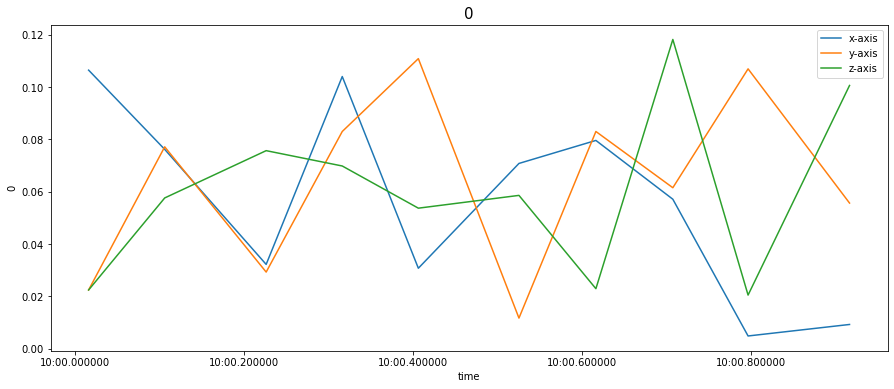

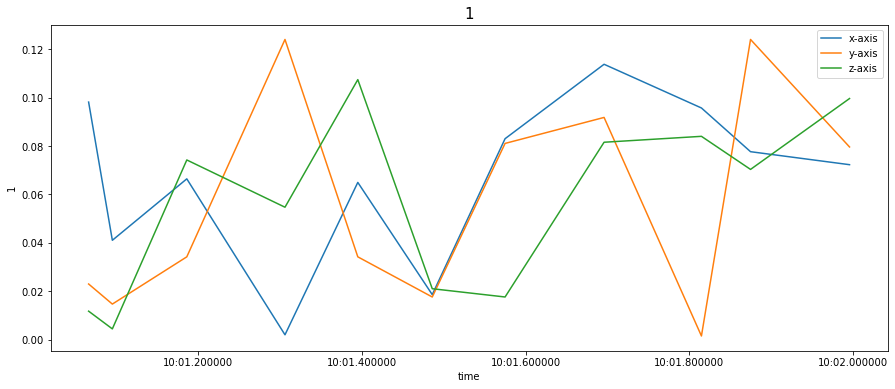

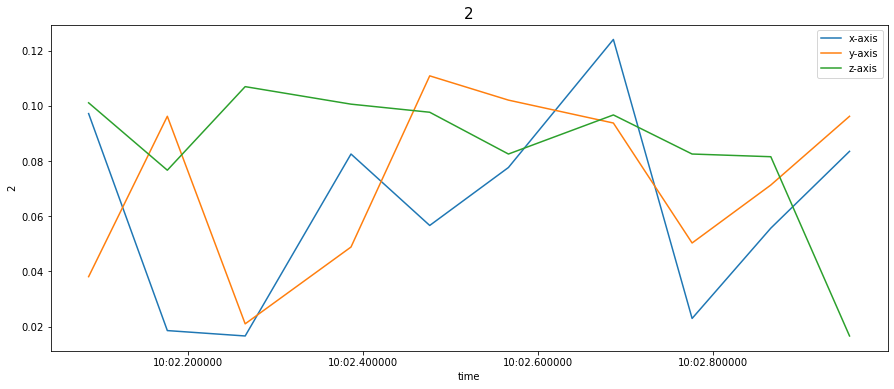

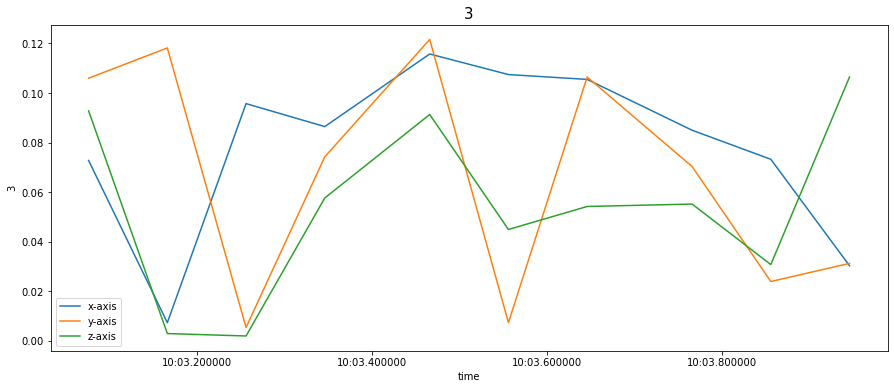

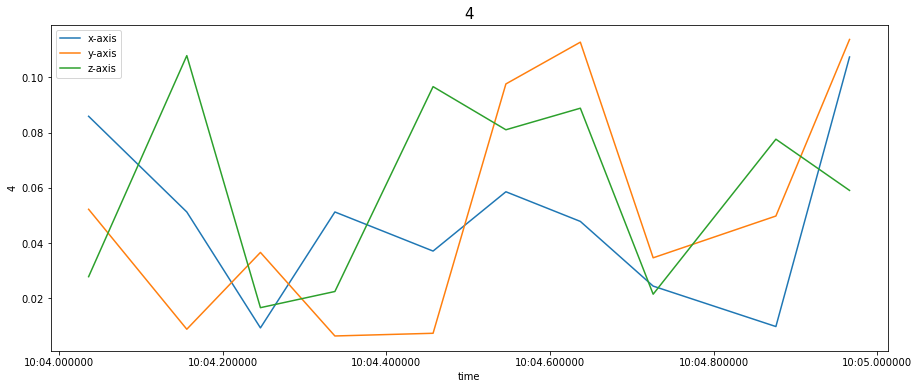

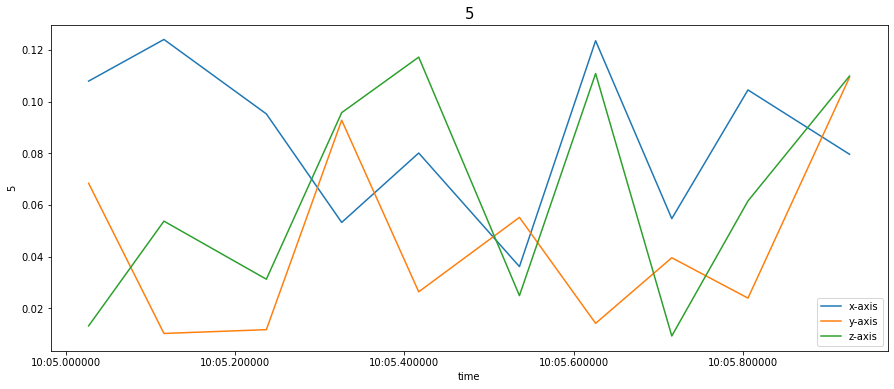

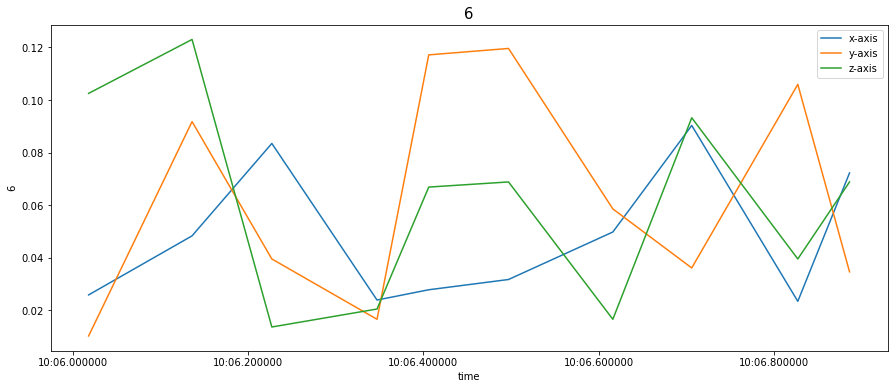

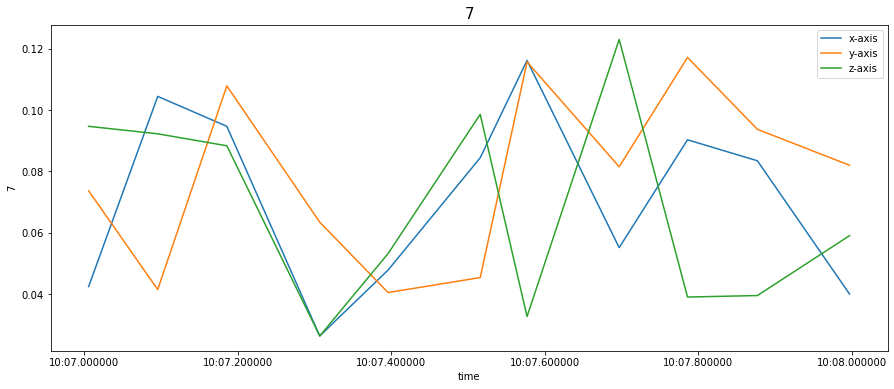

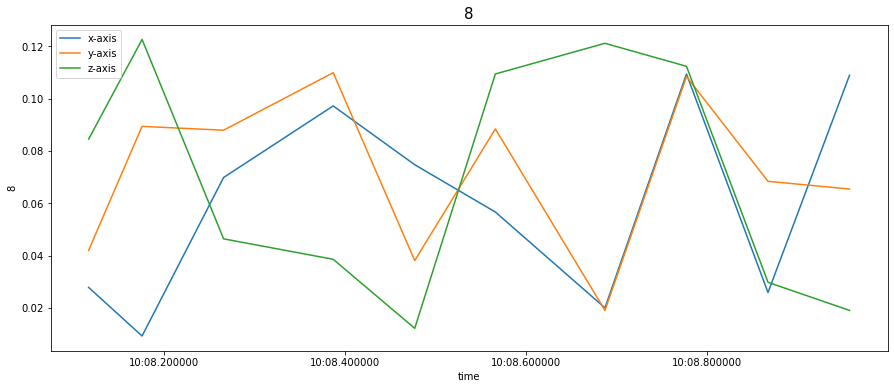

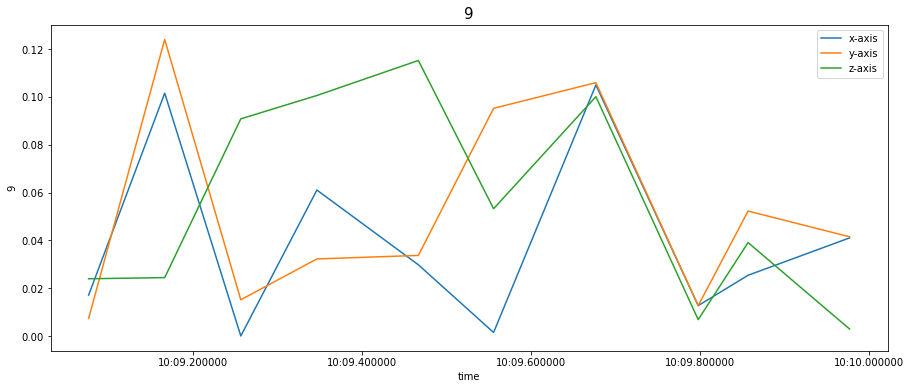

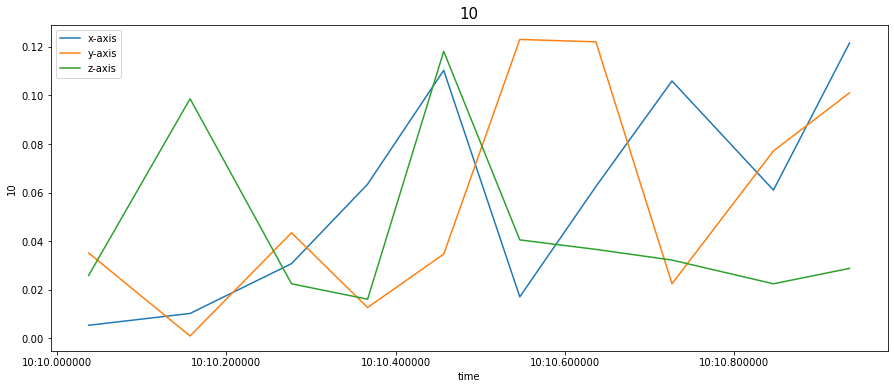

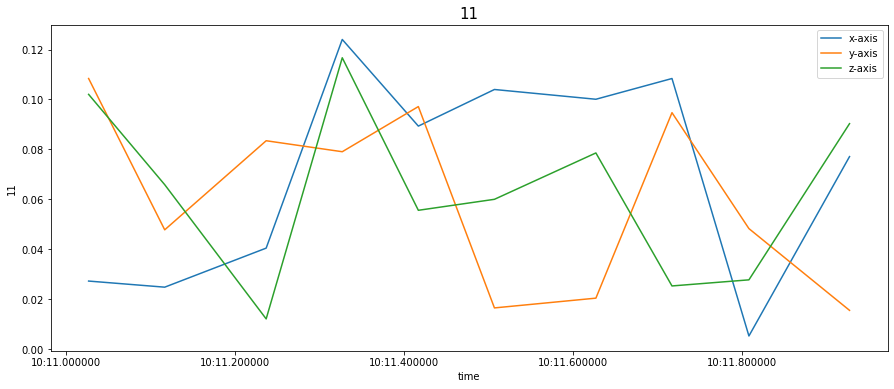

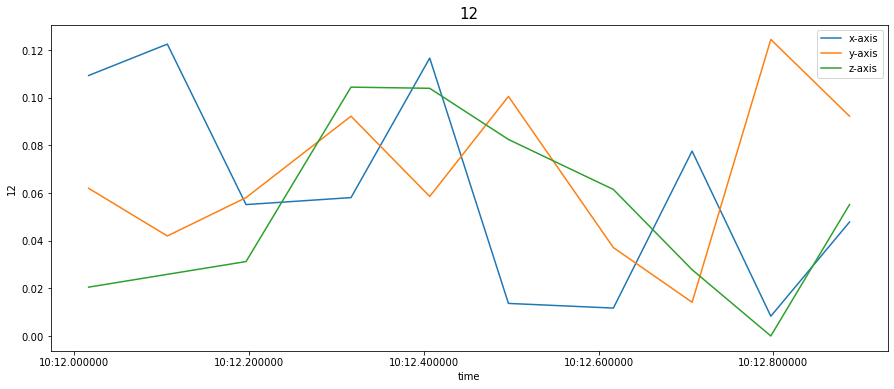

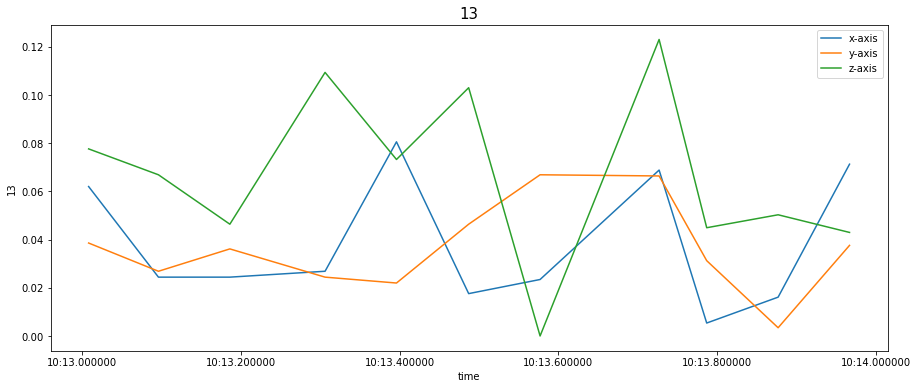

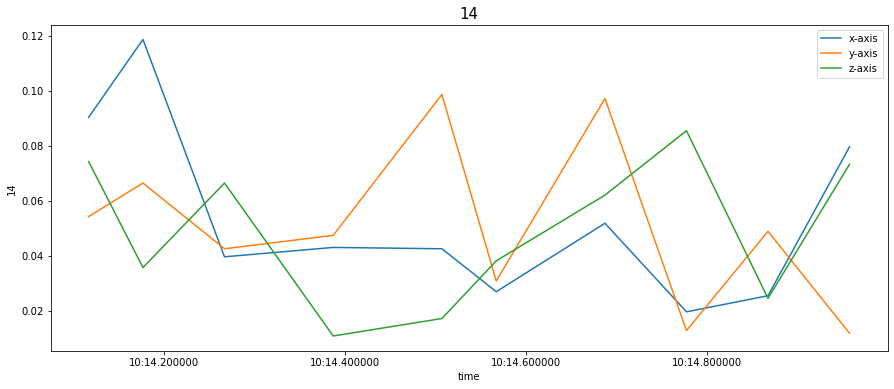

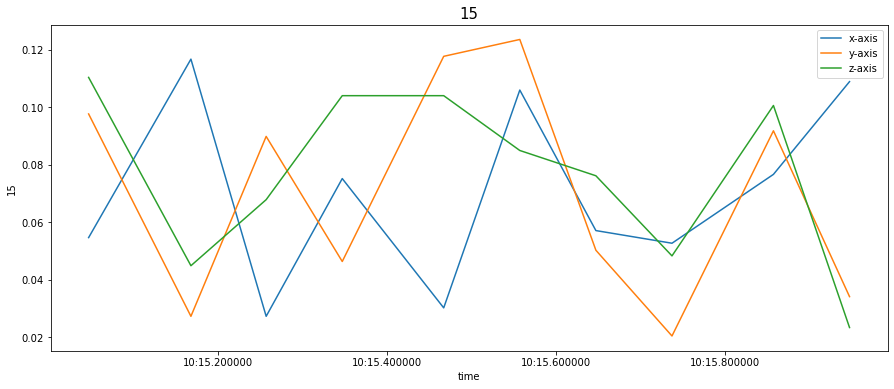

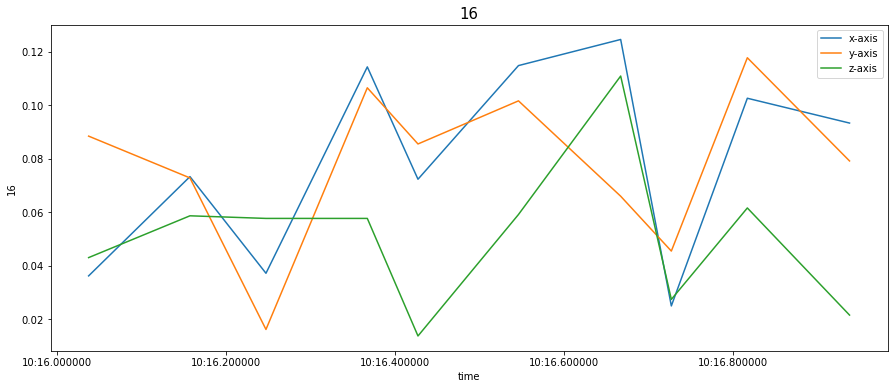

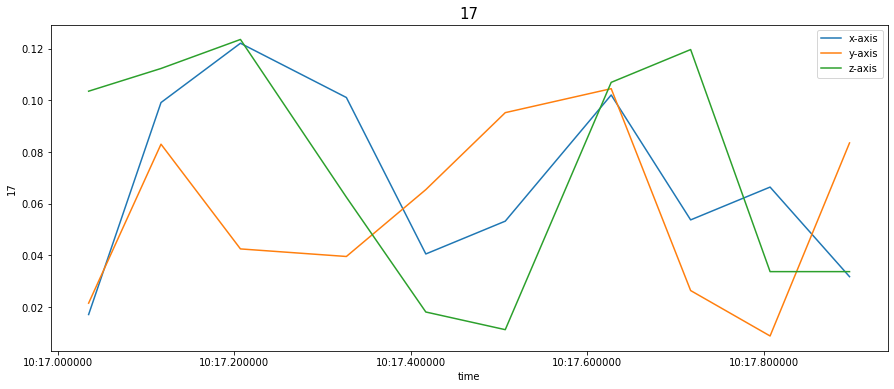

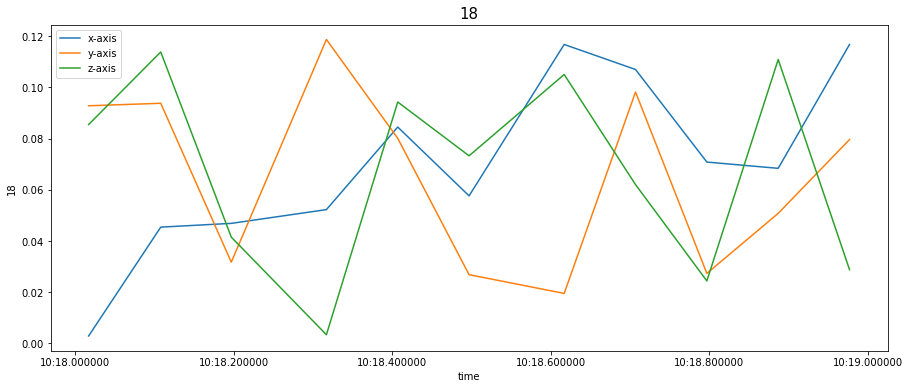

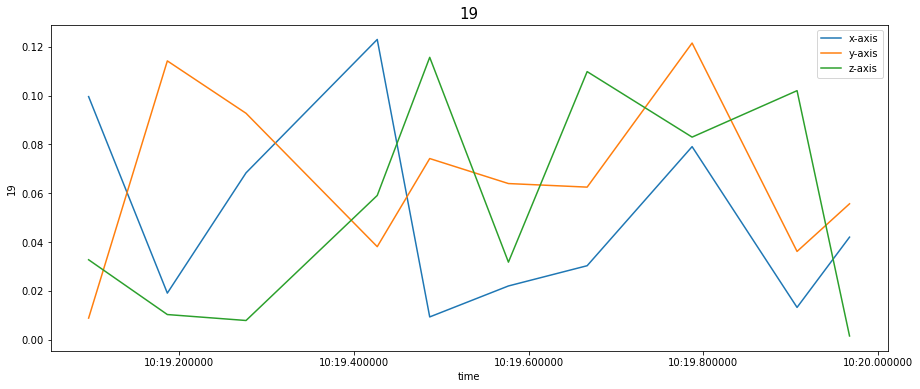

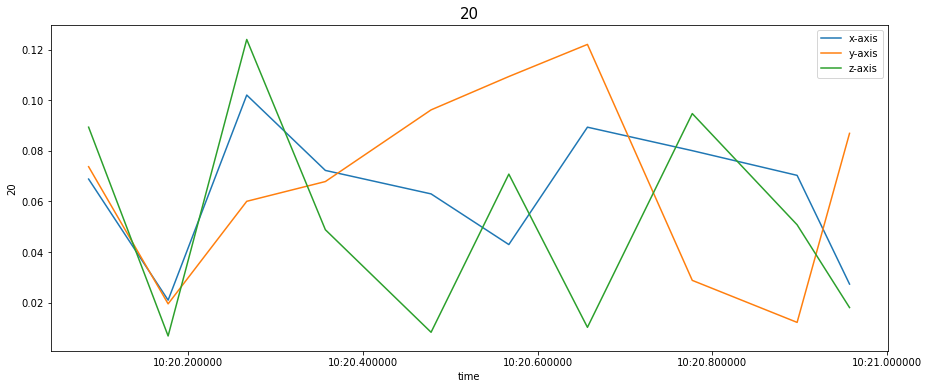

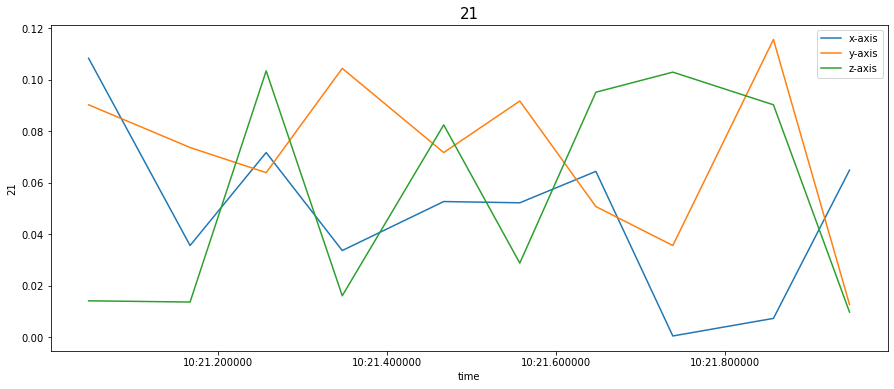

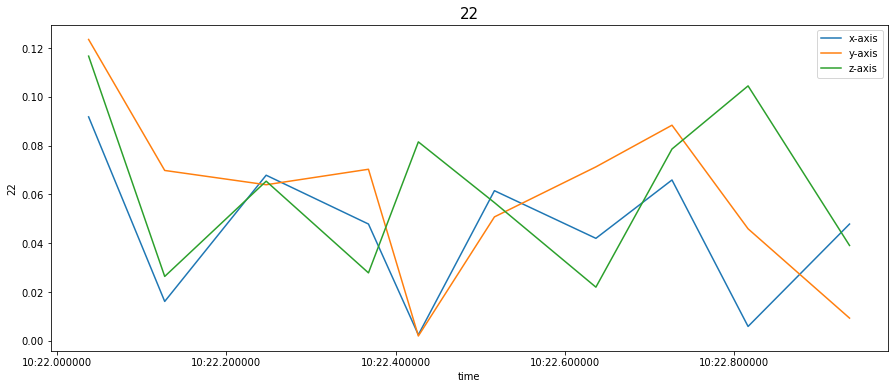

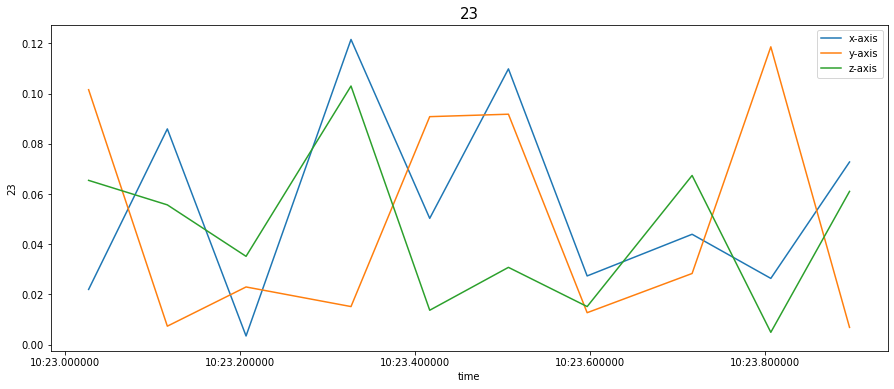

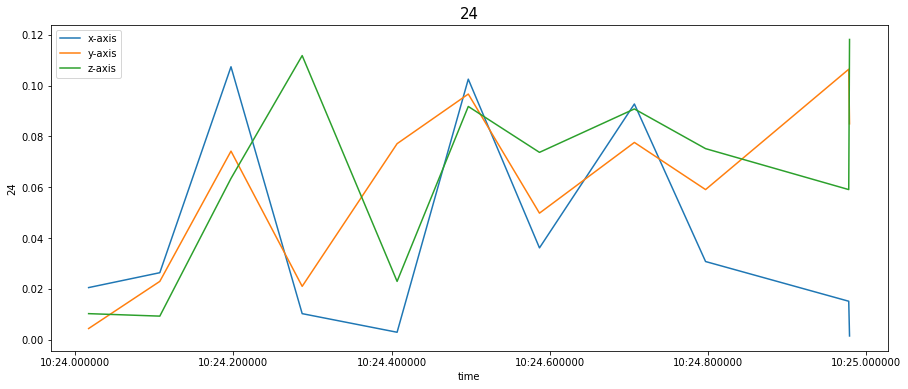

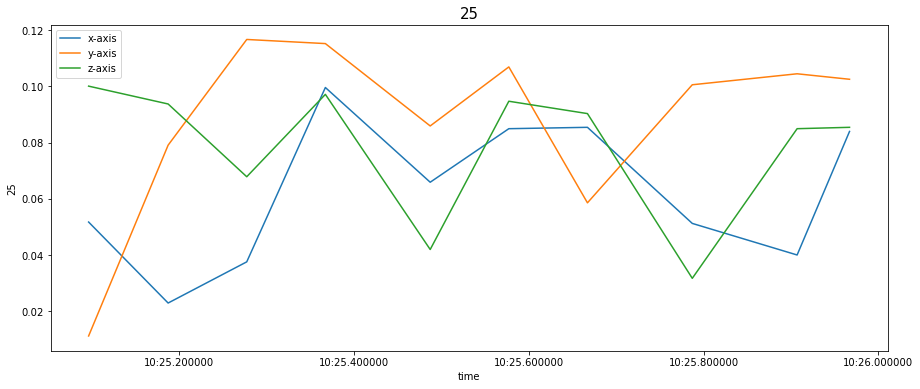

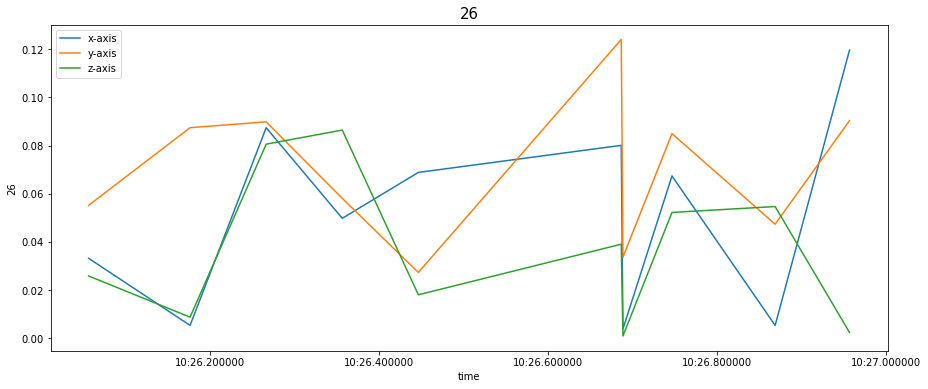

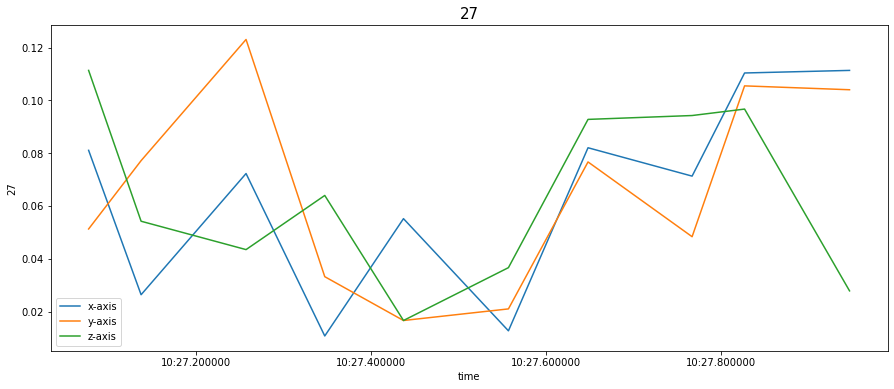

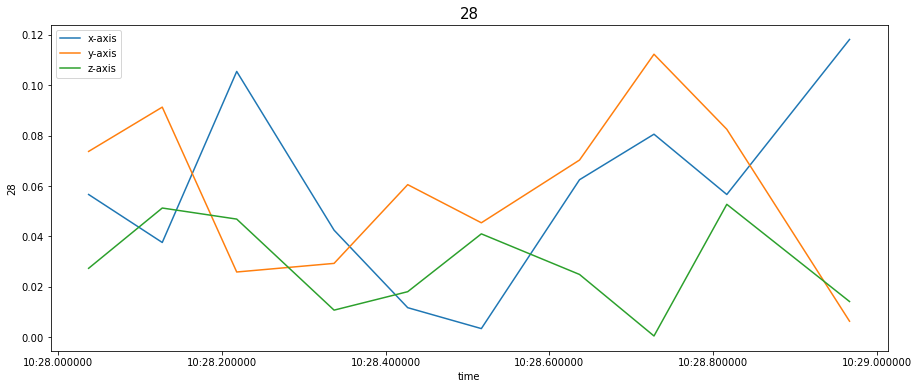

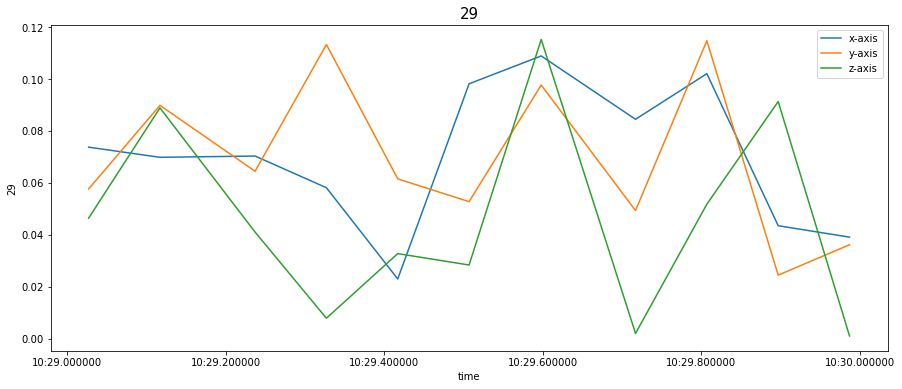

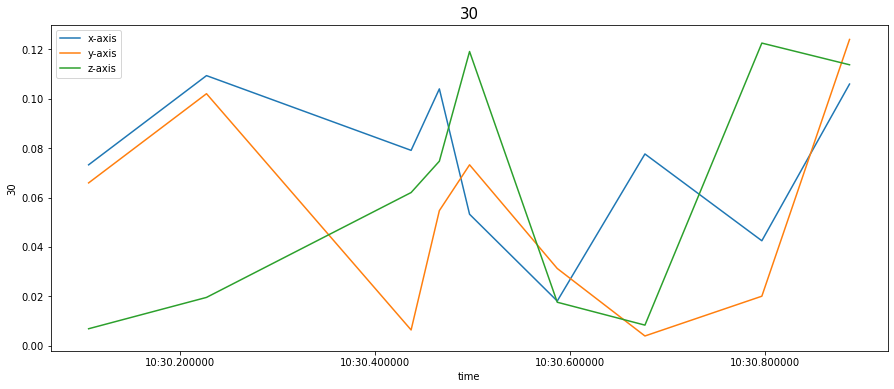

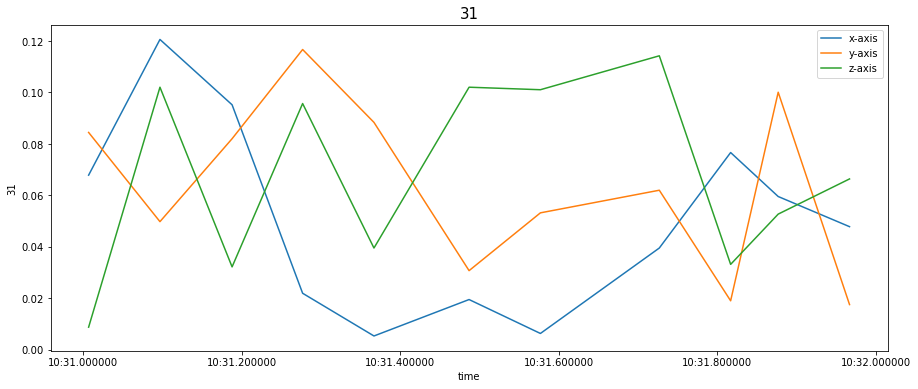

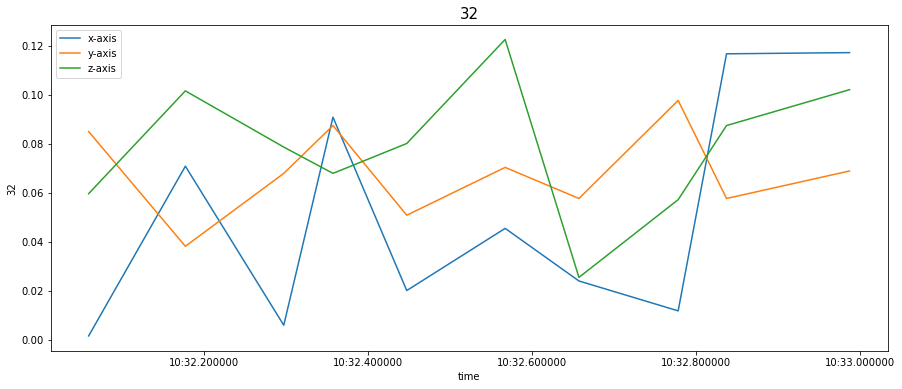

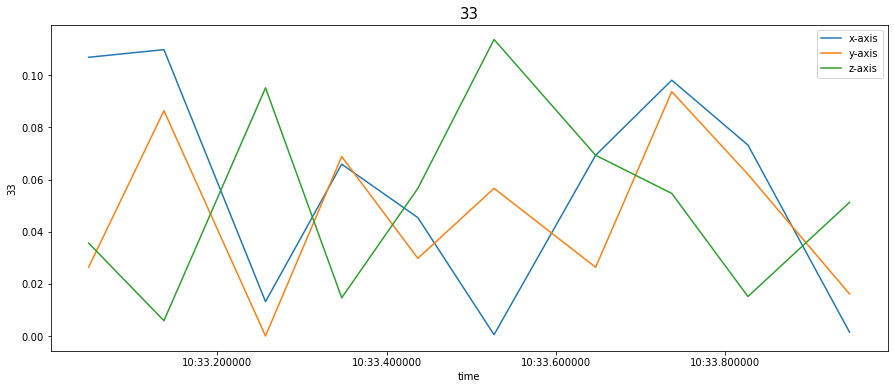

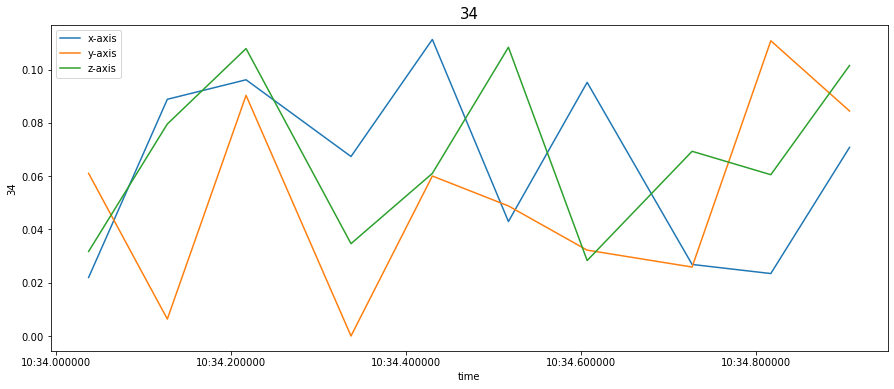

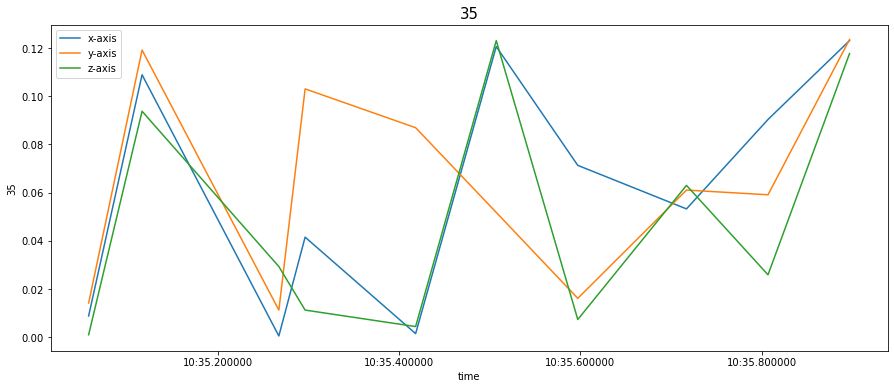

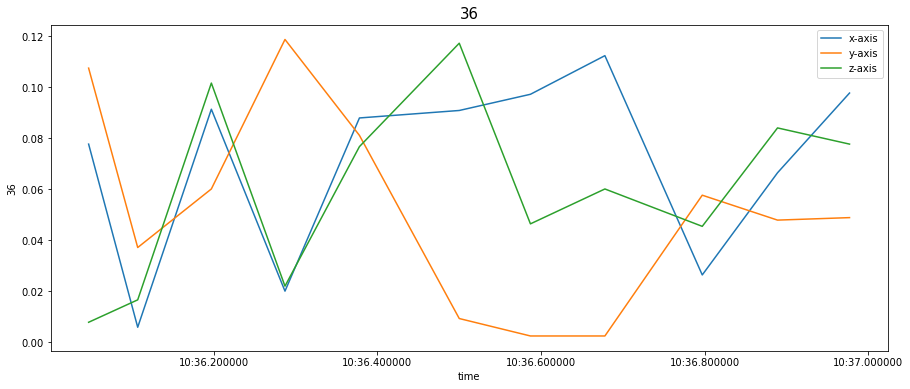

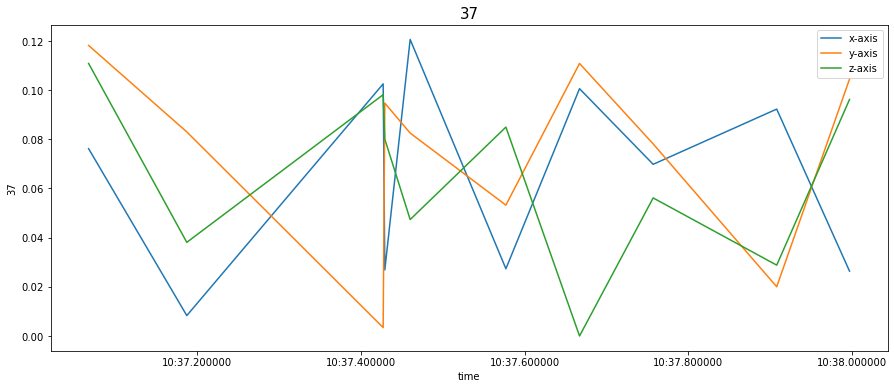

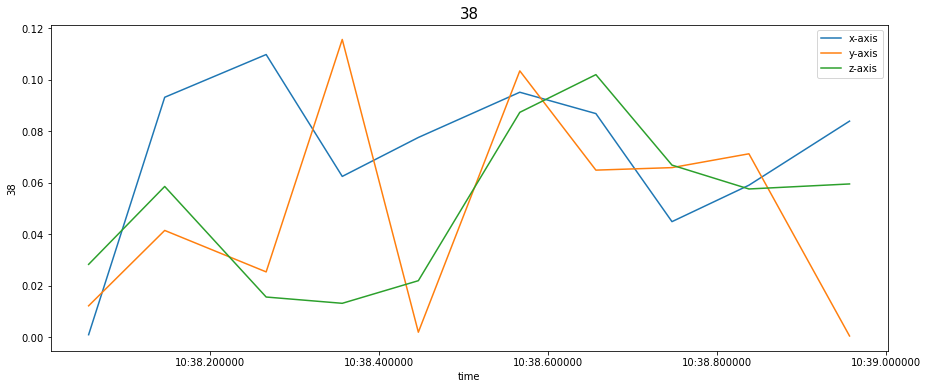

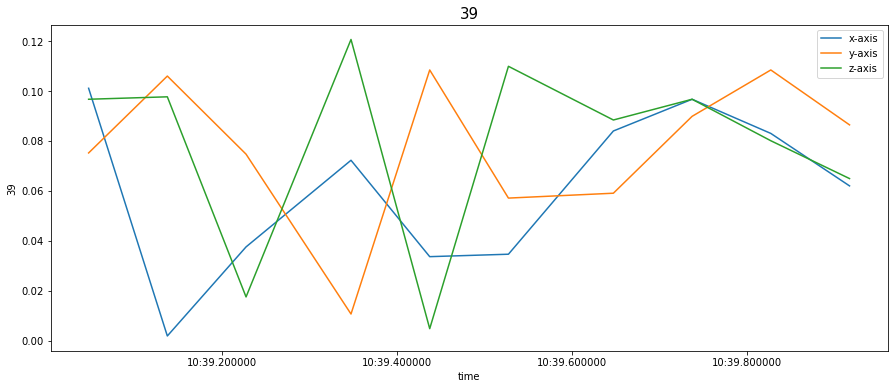

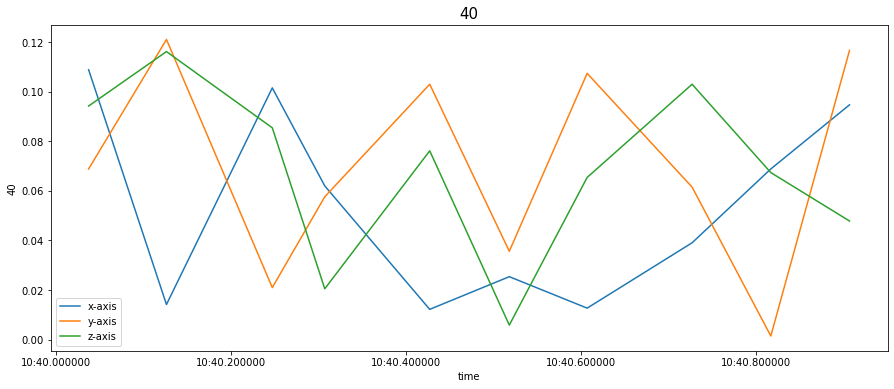

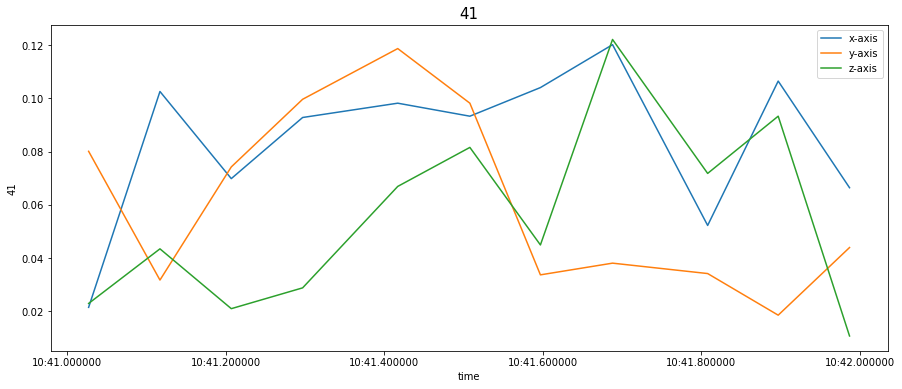

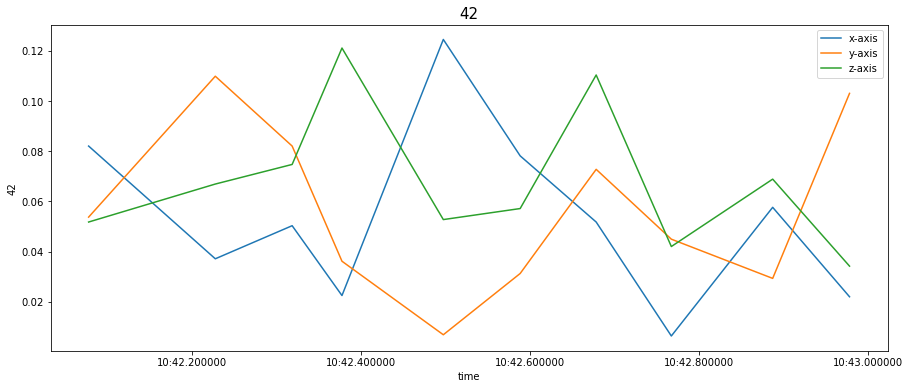

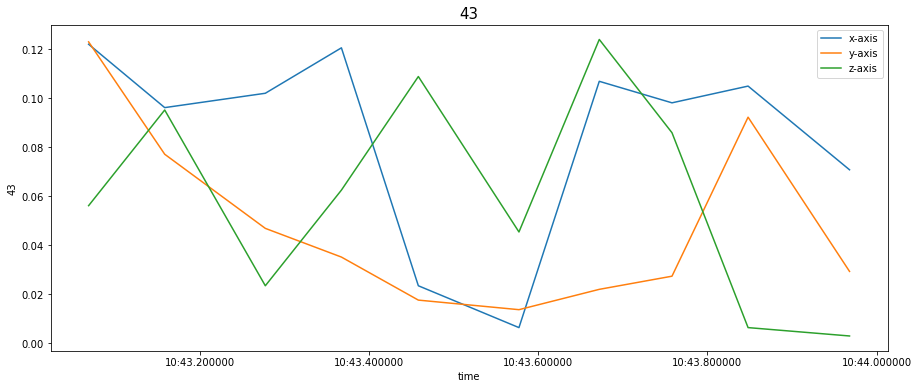

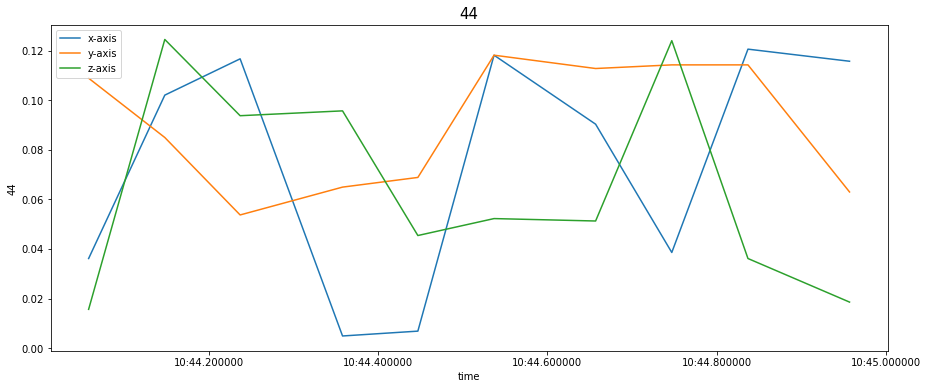

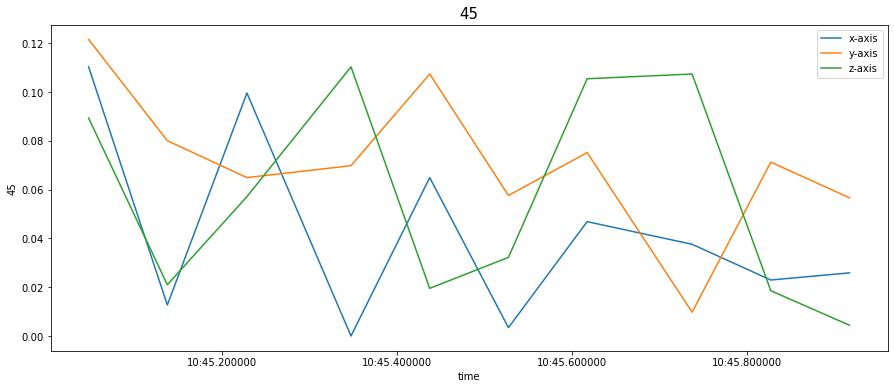

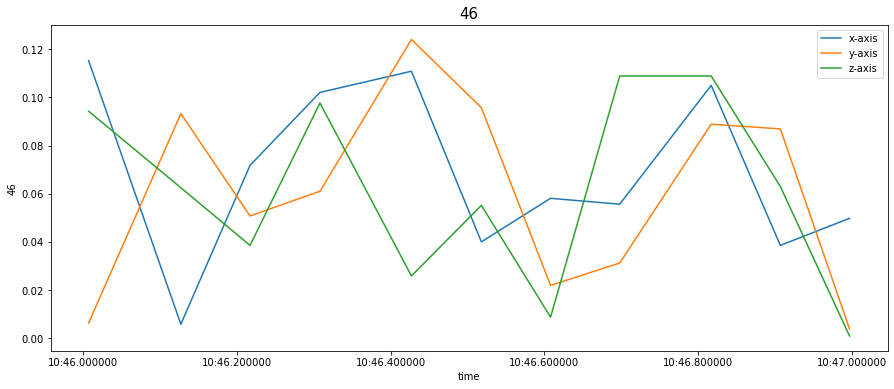

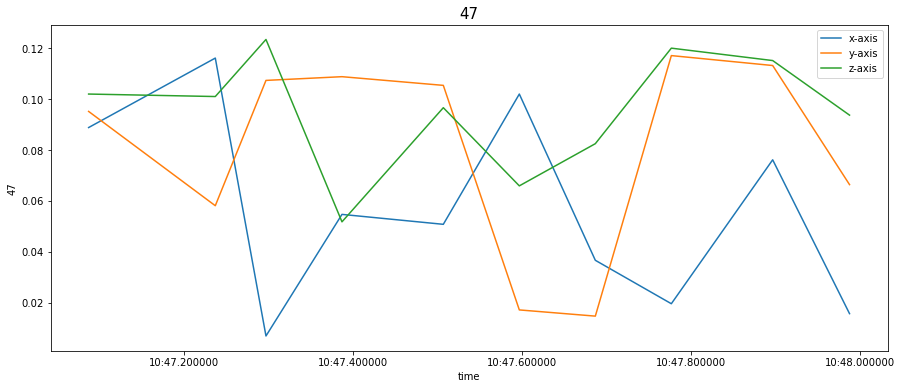

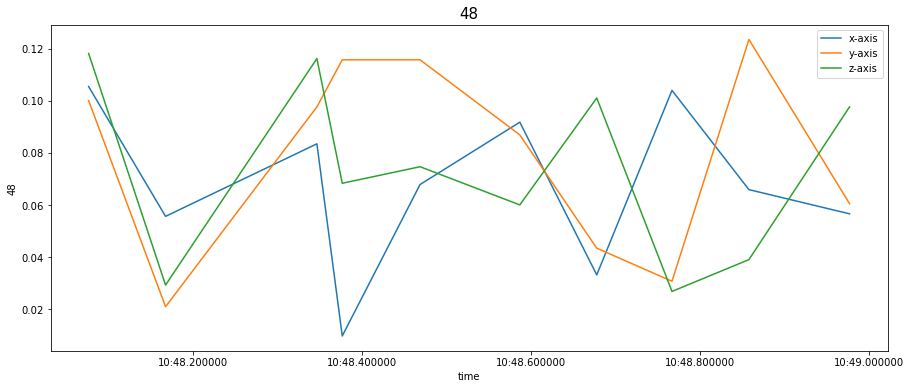

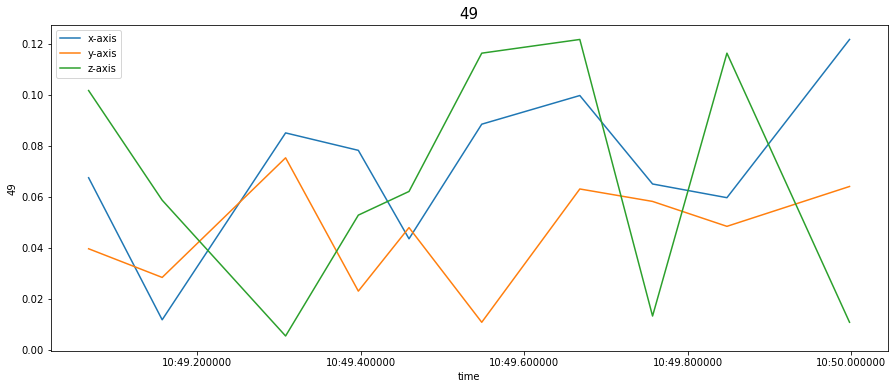

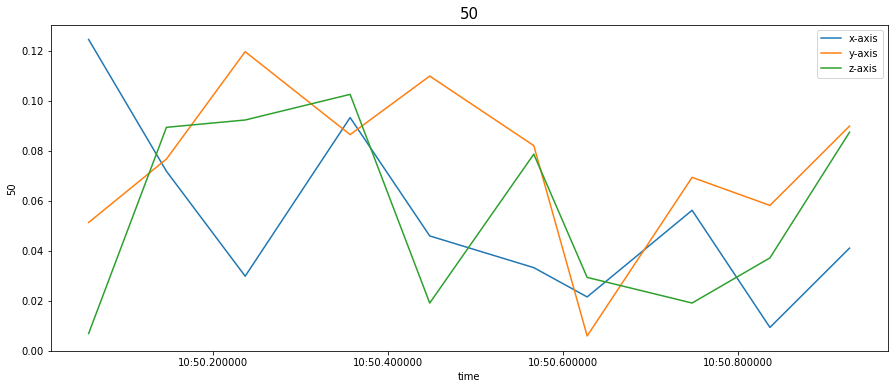

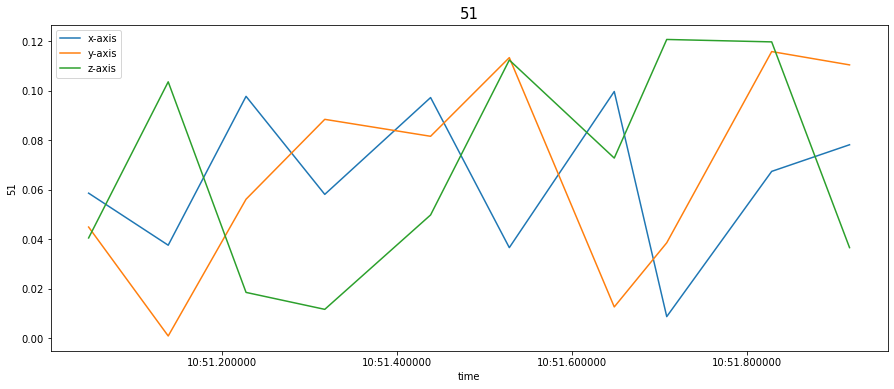

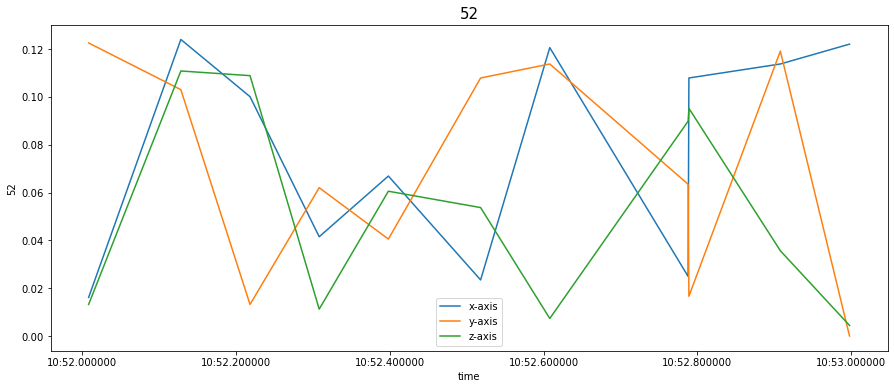

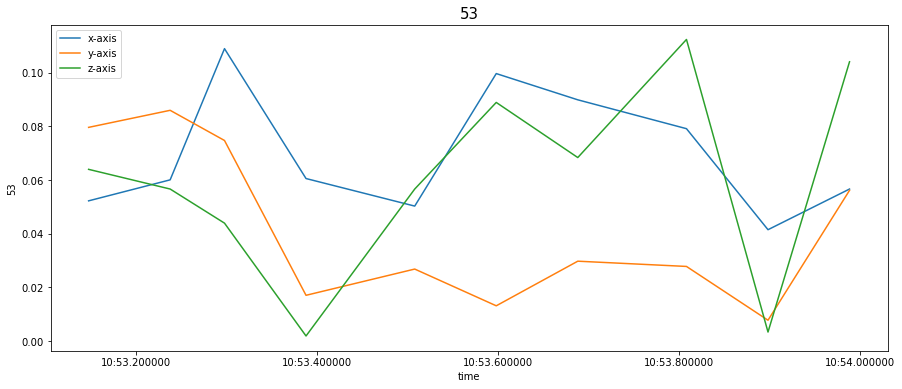

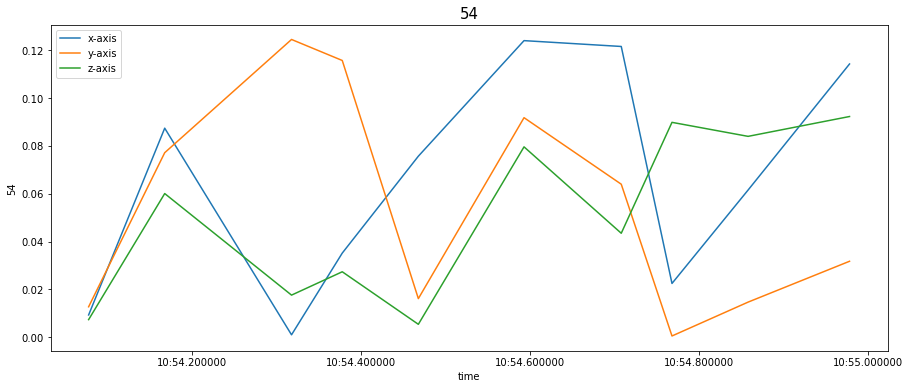

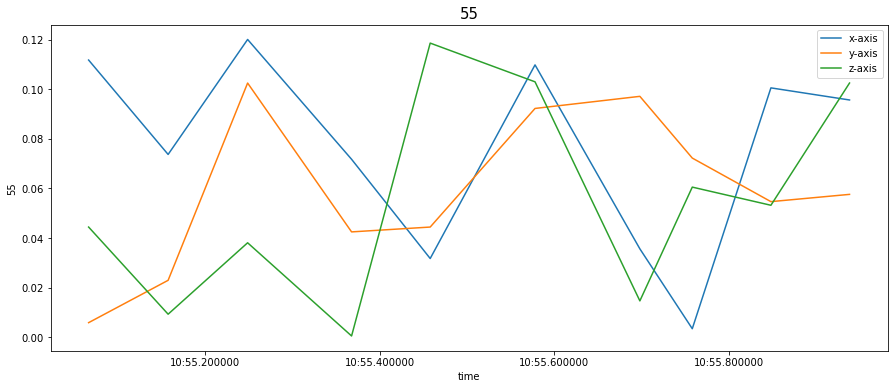

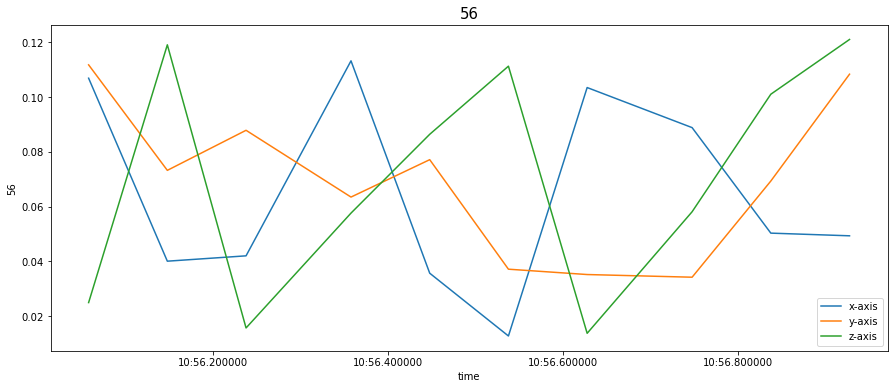

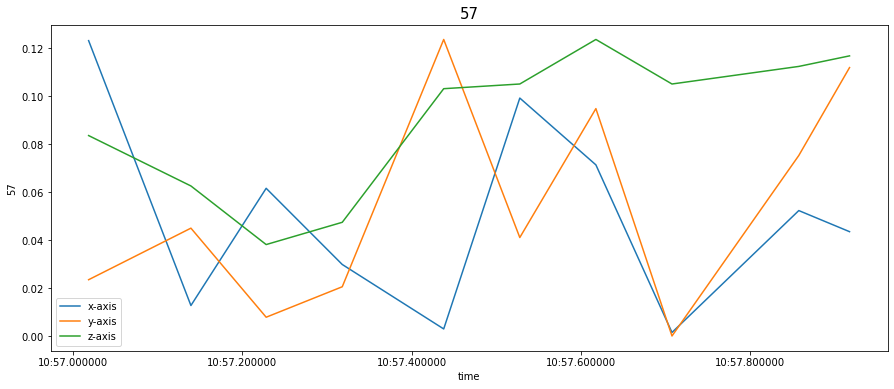

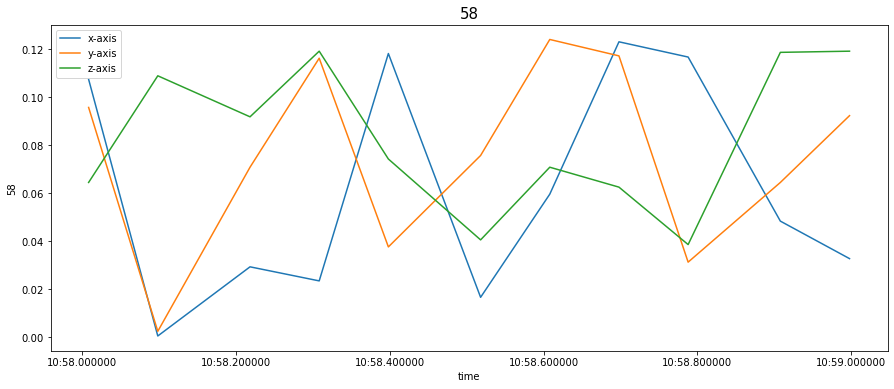

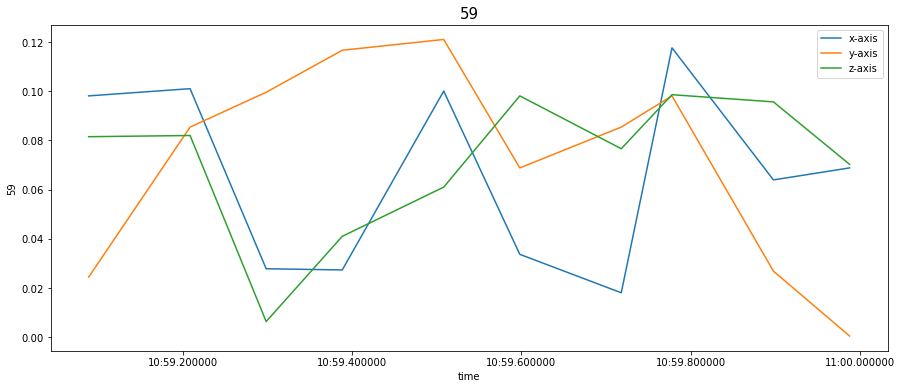

In [7]:
#df_raw_micro = df_raw_micro.set_index('time')

df_raw_micro['second'] = pd.to_datetime(df_raw_micro['time'], format='%H:%M').dt.second

for i in range(0,60):
    current_second = df_raw_micro[(df_raw_micro['second'] == i)]
    plt.figure(figsize=(15,6))
    sns.lineplot(y = 'acx', x = 'time', data = current_second)
    sns.lineplot(y = 'acy', x = 'time', data = current_second)
    sns.lineplot(y = 'acz', x = 'time', data = current_second)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()